In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [6]:
def exponential(x, A, B, C): return A*np.exp(B*(x)) + C
def fit_exponential(xs, ys, p0=(1,1,1), params=False):
    popt, pcov = curve_fit(f=exponential, xdata=xs, ydata=ys)
    xFit = np.arange(min(xs)-0.1,max(xs)+0.1, 2e-4)
    A, B, C = popt
    err = np.diag(pcov)**0.5
    if params:
        A,B,C = params
    label = f'Best-fit parameters for\n      '+  r'$y=A e^{Bx} + C$' + f'\nA = {A:.3f}' + r' $\pm$ ' + f'{err[0]:.3f}\n' \
            + r'k' + f' = {B:.3f}' + r' $\pm$ ' + f'{err[1]:.3f}\n' \
            + r'C' + f' = {C:.3f}' + r' $\pm$ ' + f'{err[2]:.3f}\n'
    return xFit, exponential(xFit, A, B, C), label

In [7]:
def find_params(v, i, max_index):
    p = v*i
    isc, voc = np.max(i), np.max(v)
    ff = p[max_index]/(isc*voc)
    del_p = p[max_index]*np.sqrt((0.001/v[max_index])**2 + (0.01/i[max_index])**2)
    print(f'''\item $V_\\text{{mp}} = {v[max_index]}$ V and $I_\\text{{mp}} = {i[max_index]}$ mA
\item Max. Power ($P_\\text{{max}}$) $= {p[max_index]:.3f} \pm {del_p:.3f} $ mW
\item Short Circuit Current ($I_\\text{{sc}}$) $= {isc} \pm 0.01$ mA
\item Open Circuit Voltage ($V_\\text{{oc}}$) $= {voc} \pm 0.001$ V
\item Fill Factor $= {ff:.3f} \pm {ff*np.sqrt((del_p/p[max_index])**2 + (0.001/voc)**2 + (0.01/isc)**2):.3f}$''')
    # print(f'Vmax = {v[max_index]} V, Imax = {i[max_index]} mA with Pmax = {p[max_index]:.3f} ± {del_p:.3f} mW')
    # print(f'Isc = {isc} mA, Voc = {voc} V')
    # print(f'FF = {ff:.3f} ± {ff*np.sqrt((del_p/p[max_index])**2 + (0.001/voc)**2 + (0.01/isc)**2):.3f}')

# purath

## no filter

\item $V_\text{mp} = 4.895$ V and $I_\text{mp} = 63.1$ mA
\item Max. Power ($P_\text{max}$) $= 308.874 \pm 0.080 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 77.1 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 5.641 \pm 0.001$ V
\item Fill Factor $= 0.710 \pm 0.000$


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


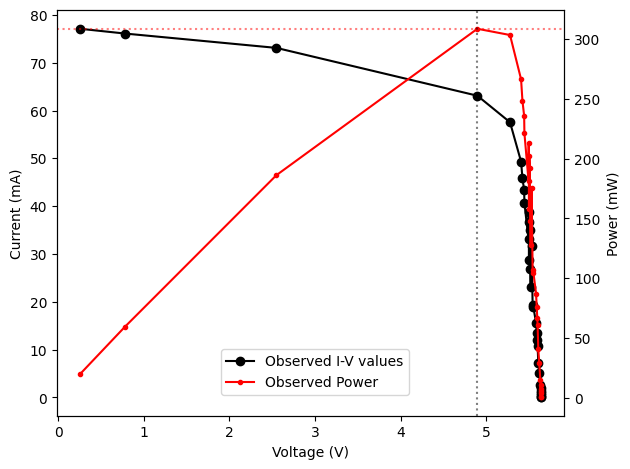

In [8]:
data = pd.read_excel('outside.xlsx', sheet_name='white')
v, i = data['V'], data['I']
# vfit, ifit, label = fit_exponential(v, i, p0=())
fig, ax1 = plt.subplots()
ax1.plot(v, i, '-ko', label='Observed I-V values')
# ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, '-r.', label='Observed Power')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

# ax1.text(0.1, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.5,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/out/no.eps')

## red

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


\item $V_\text{mp} = 4.312$ V and $I_\text{mp} = 30.87$ mA
\item Max. Power ($P_\text{max}$) $= 133.111 \pm 0.053 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 52.61 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 5.128 \pm 0.001$ V
\item Fill Factor $= 0.493 \pm 0.000$


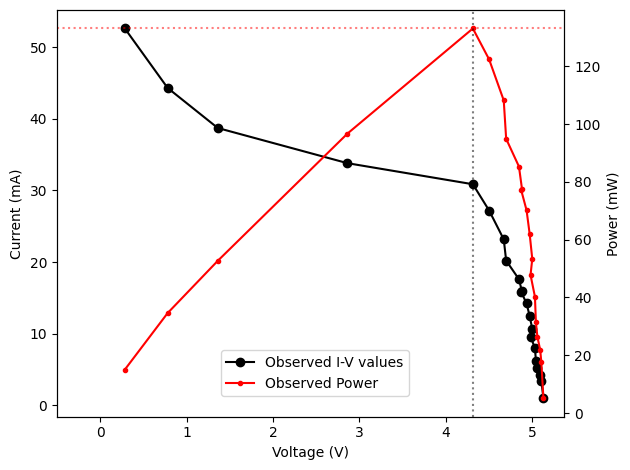

In [9]:
data = pd.read_excel('outside.xlsx', sheet_name='red')
v, i = data['V'], data['I']
# vfit, ifit, label = fit_exponential(v, i)
fig, ax1 = plt.subplots()
ax1.plot(v, i, '-ko', label='Observed I-V values')
# ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')
ax1.set_xlim(left=-0.5)

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, '-r.', label='Observed Power')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

# ax1.text(0.15, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.5,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/out/red.eps')

## blue

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


\item $V_\text{mp} = 4.508$ V and $I_\text{mp} = 40.98$ mA
\item Max. Power ($P_\text{max}$) $= 184.738 \pm 0.061 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 43.41 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 5.301 \pm 0.001$ V
\item Fill Factor $= 0.803 \pm 0.000$


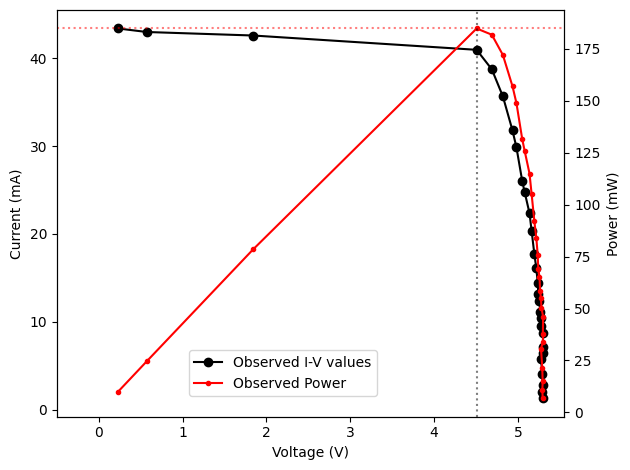

In [10]:
data = pd.read_excel('outside.xlsx', sheet_name='blue')
v, i = data['V'], data['I']
# vfit, ifit, label = fit_exponential(v, i)
fig, ax1 = plt.subplots()
ax1.plot(v, i, '-ko', label='Observed I-V values')
# ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')
ax1.set_xlim(left=-0.5)

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, '-r.', label='Observed Power')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

# ax1.text(0.15, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.45,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/out/blue.eps')

## green

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


\item $V_\text{mp} = 4.426$ V and $I_\text{mp} = 33.72$ mA
\item Max. Power ($P_\text{max}$) $= 149.245 \pm 0.056 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 37.35 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 5.309 \pm 0.001$ V
\item Fill Factor $= 0.753 \pm 0.000$


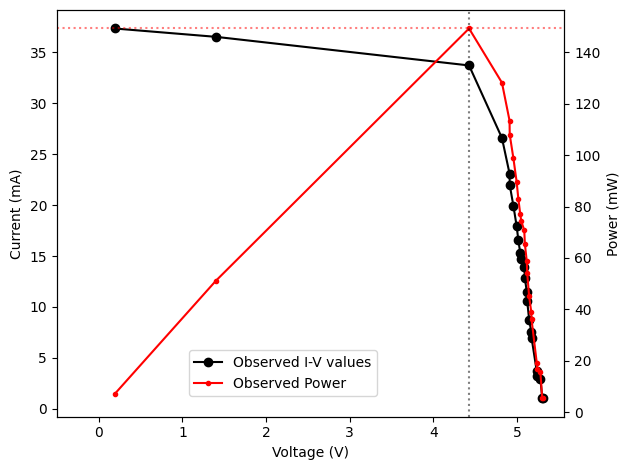

In [11]:
data = pd.read_excel('outside.xlsx', sheet_name='green')
v, i = data['V'], data['I']
# vfit, ifit, label = fit_exponential(v, i)
fig, ax1 = plt.subplots()
ax1.plot(v, i, '-ko', label='Observed I-V values')
# ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')
ax1.set_xlim(left=-0.5)

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, '-r.', label='Observed Power')
# ax2.plot(vfit, vfit*ifit, '-r')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

# ax1.text(0.15, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.45,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/out/green.eps')

## yellow

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


\item $V_\text{mp} = 4.122$ V and $I_\text{mp} = 73.1$ mA
\item Max. Power ($P_\text{max}$) $= 301.318 \pm 0.084 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 77.1 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 5.369 \pm 0.001$ V
\item Fill Factor $= 0.728 \pm 0.000$


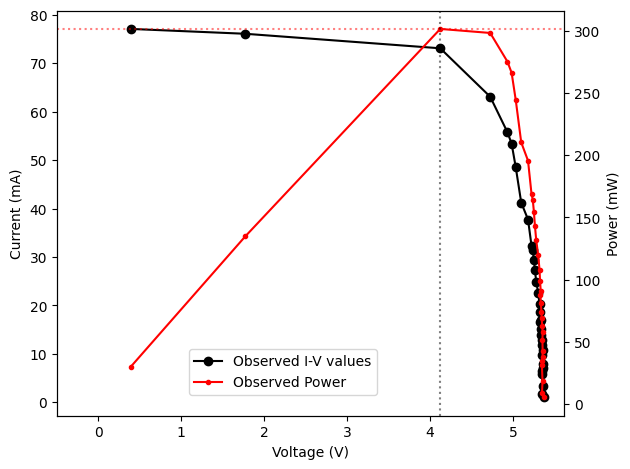

In [12]:
data = pd.read_excel('outside.xlsx', sheet_name='yellow')
v, i = data['V'], data['I']
# vfit, ifit, label = fit_exponential(v, i)
fig, ax1 = plt.subplots()
ax1.plot(v, i, '-ko', label='Observed I-V values')
# ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')
ax1.set_xlim(left=-0.5)

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, '-r.', label='Observed Power')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

# ax1.text(0.15, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.45,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/out/yellow.eps')

## pink

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


\item $V_\text{mp} = 4.215$ V and $I_\text{mp} = 24.69$ mA
\item Max. Power ($P_\text{max}$) $= 104.068 \pm 0.049 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 31.38 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 5.151 \pm 0.001$ V
\item Fill Factor $= 0.644 \pm 0.000$


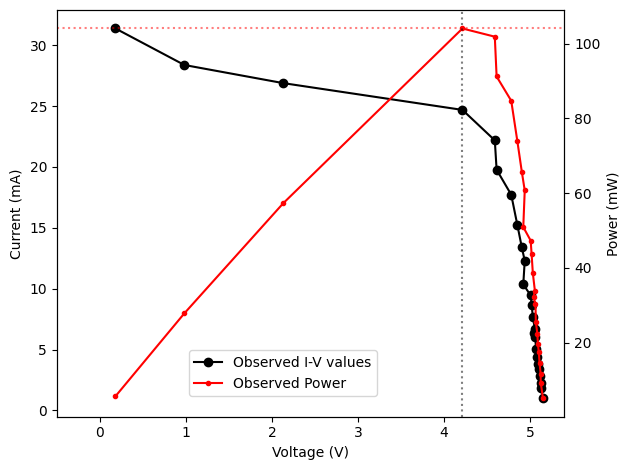

In [13]:
data = pd.read_excel('outside.xlsx', sheet_name='pink')
v, i = data['V'], data['I']
# vfit, ifit, label = fit_exponential(v, i)
fig, ax1 = plt.subplots()
ax1.plot(v, i, '-ko', label='Observed I-V values')
# ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')
ax1.set_xlim(left=-0.5)

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, '-r.', label='Observed Power')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

# ax1.text(0.15, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.45,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/out/pink.eps')

## spectral distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


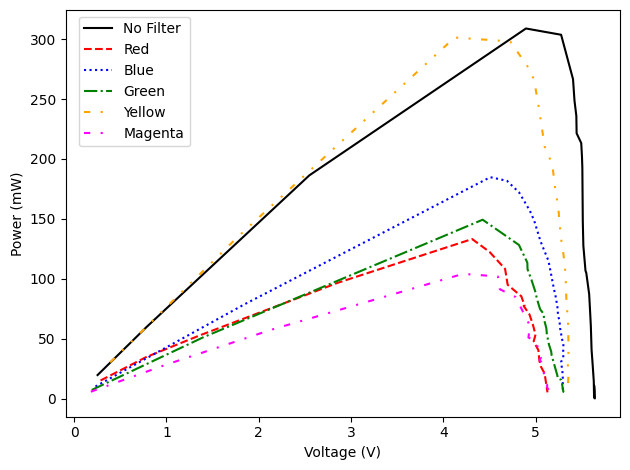

In [83]:
fig, ax1 = plt.subplots()
cols = ['k', 'r', 'b', 'g', 'orange', 'magenta']
ls = ['-', '--', ':', '-.', (0, (3, 5, 1, 5, 1, 5)), (0, (3, 5, 1, 5))]
filters = ['white', 'red', 'blue', 'green', 'yellow', 'pink']
filter_names = ['No Filter', 'Red', 'Blue', 'Green', 'Yellow', 'Magenta']
 
for j, color in enumerate(filters):
    data = pd.read_excel('outside.xlsx', sheet_name=color)
    v, i = data['V'], data['I']
    # vfit, ifit, label = fit_exponential(v, i)
    ax1.plot(v, v*i, linestyle=ls[j], color=cols[j], label=filter_names[j])
    ax1.set_ylabel('Power (mW)')
    ax1.set_xlabel('Voltage (V)')

fig.legend(loc='lower left', bbox_to_anchor=(0.12,0.67), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
plt.savefig('images/out/powers.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


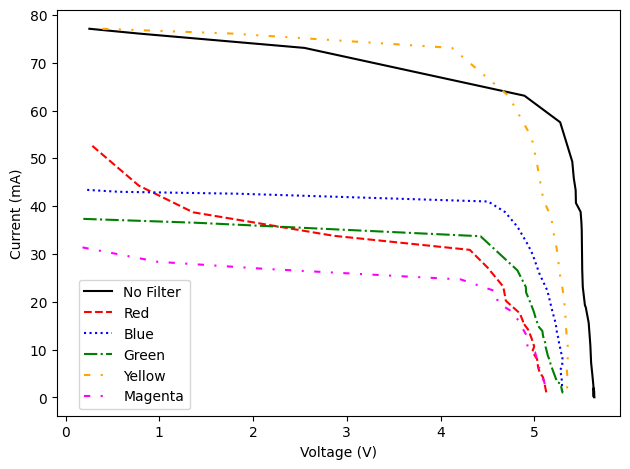

In [84]:
fig, ax1 = plt.subplots()
 
for j, color in enumerate(filters):
    data = pd.read_excel('outside.xlsx', sheet_name=color)
    v, i = data['V'], data['I']
    ax1.plot(v, i, linestyle=ls[j], color=cols[j], label=filter_names[j])
    ax1.set_ylabel('Current (mA)')
    ax1.set_xlabel('Voltage (V)')
    # ax1.set_xlim(right=7)

fig.legend(loc='lower left', bbox_to_anchor=(0.12,0.12), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
plt.savefig('images/out/iv.eps')

# ullil

## no filter

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


\item $V_\text{mp} = 2.318$ V and $I_\text{mp} = 0.395$ mA
\item Max. Power ($P_\text{max}$) $= 0.916 \pm 0.023 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 0.555 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 3.257 \pm 0.001$ V
\item Fill Factor $= 0.507 \pm 0.016$


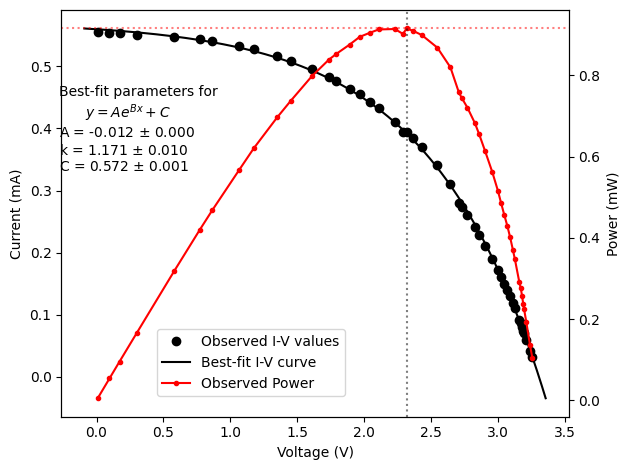

In [14]:
data = pd.read_excel('inside.xlsx', sheet_name='white')
v, i = data['V'], data['I']
vfit, ifit, label = fit_exponential(v, i)
fig, ax1 = plt.subplots()
ax1.plot(v, i, 'ko', label='Observed I-V values')
ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, '-r.', label='Observed Power')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

ax1.text(0.1, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.4,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/in/no.eps')

## red

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


\item $V_\text{mp} = 1.523$ V and $I_\text{mp} = 0.121$ mA
\item Max. Power ($P_\text{max}$) $= 0.184 \pm 0.015 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 0.175 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 2.323 \pm 0.001$ V
\item Fill Factor $= 0.453 \pm 0.046$


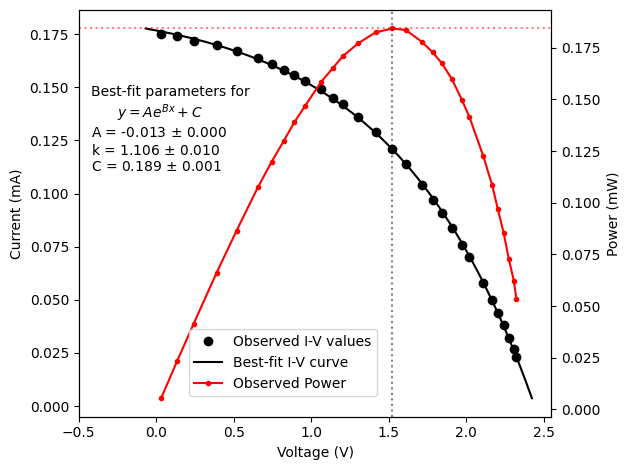

In [15]:
data = pd.read_excel('inside.xlsx', sheet_name='red')
v, i = data['V'], data['I']
vfit, ifit, label = fit_exponential(v, i)
fig, ax1 = plt.subplots()
ax1.plot(v, i, 'ko', label='Observed I-V values')
ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')
ax1.set_xlim(left=-0.5)

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, '-r.', label='Observed Power')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

ax1.text(0.15, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.45,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/in/red.eps')

## blue

\item $V_\text{mp} = 1.815$ V and $I_\text{mp} = 0.18$ mA
\item Max. Power ($P_\text{max}$) $= 0.327 \pm 0.018 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 0.25 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 2.695 \pm 0.001$ V
\item Fill Factor $= 0.485 \pm 0.033$


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


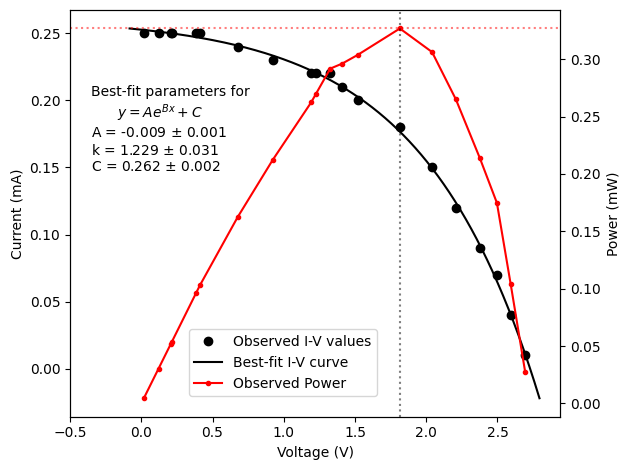

In [17]:
data = pd.read_excel('inside.xlsx', sheet_name='blue')
v, i = data['V'], data['I']
vfit, ifit, label = fit_exponential(v, i)
fig, ax1 = plt.subplots()
ax1.plot(v, i, 'ko', label='Observed I-V values')
ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')
ax1.set_xlim(left=-0.5)

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, '-r.', label='Observed Power')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

ax1.text(0.15, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.45,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/in/blue.eps')

## green

\item $V_\text{mp} = 1.297$ V and $I_\text{mp} = 0.1$ mA
\item Max. Power ($P_\text{max}$) $= 0.130 \pm 0.013 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 0.14 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 2.165 \pm 0.001$ V
\item Fill Factor $= 0.428 \pm 0.053$


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


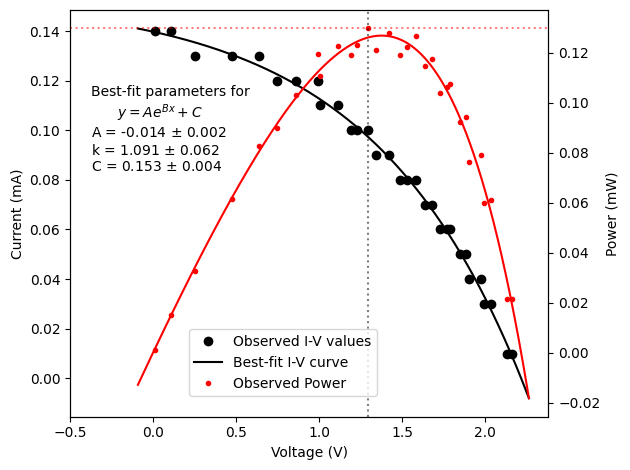

In [19]:
data = pd.read_excel('inside.xlsx', sheet_name='green')
v, i = data['V'], data['I']
vfit, ifit, label = fit_exponential(v, i)
fig, ax1 = plt.subplots()
ax1.plot(v, i, 'ko', label='Observed I-V values')
ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')
ax1.set_xlim(left=-0.5)

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, 'r.', label='Observed Power')
ax2.plot(vfit, vfit*ifit, '-r')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

ax1.text(0.15, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.45,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/in/green.eps')

## yellow

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


\item $V_\text{mp} = 1.957$ V and $I_\text{mp} = 0.24$ mA
\item Max. Power ($P_\text{max}$) $= 0.470 \pm 0.020 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 0.33 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 2.91 \pm 0.001$ V
\item Fill Factor $= 0.489 \pm 0.025$


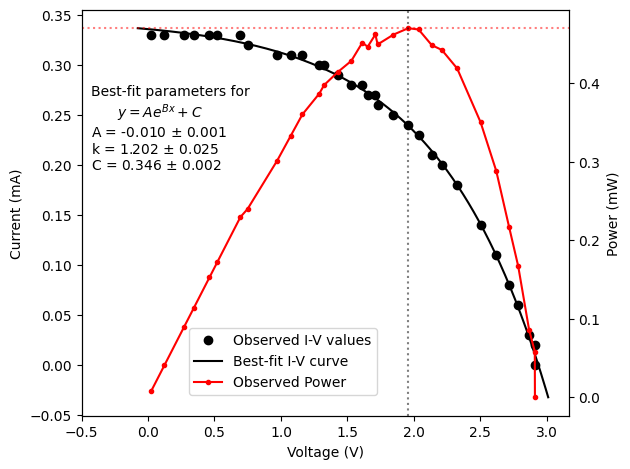

In [20]:
data = pd.read_excel('inside.xlsx', sheet_name='yellow')
v, i = data['V'], data['I']
vfit, ifit, label = fit_exponential(v, i)
fig, ax1 = plt.subplots()
ax1.plot(v, i, 'ko', label='Observed I-V values')
ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')
ax1.set_xlim(left=-0.5)

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, '-r.', label='Observed Power')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

ax1.text(0.15, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.45,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/in/yellow.eps')

## pink

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


\item $V_\text{mp} = 1.928$ V and $I_\text{mp} = 0.27$ mA
\item Max. Power ($P_\text{max}$) $= 0.521 \pm 0.019 $ mW
\item Short Circuit Current ($I_\text{sc}$) $= 0.36 \pm 0.01$ mA
\item Open Circuit Voltage ($V_\text{oc}$) $= 2.971 \pm 0.001$ V
\item Fill Factor $= 0.487 \pm 0.023$


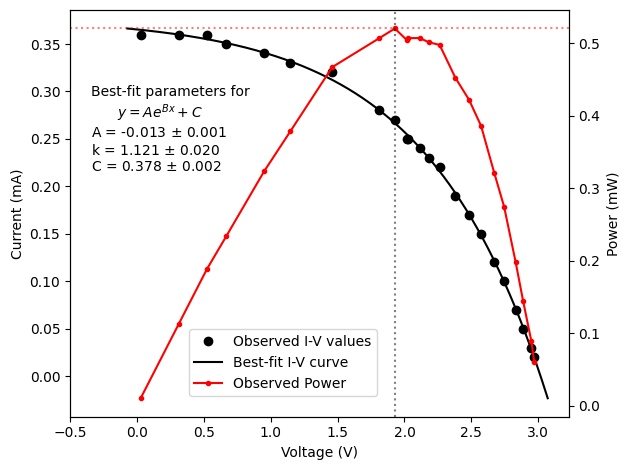

In [21]:
data = pd.read_excel('inside.xlsx', sheet_name='pink')
v, i = data['V'], data['I']
vfit, ifit, label = fit_exponential(v, i)
fig, ax1 = plt.subplots()
ax1.plot(v, i, 'ko', label='Observed I-V values')
ax1.plot(vfit, ifit, '-k', label='Best-fit I-V curve')
ax1.set_ylabel('Current (mA)')
ax1.set_xlabel('Voltage (V)')
ax1.set_xlim(left=-0.5)

ax2 = ax1.twinx() 
ax2.set_ylabel('Power (mW)')
p = v*i
ax2.plot(v, p, '-r.', label='Observed Power')
ax2.axhline(np.max(p), linestyle=':', alpha=0.5, color='r')
max_index = np.where(p == np.max(p))[0][0]
ax2.axvline(v[max_index], linestyle=':', alpha=0.5, color='k')

ax1.text(0.15, 0.6, label, transform=plt.gcf().transFigure)
fig.legend(loc='lower center', bbox_to_anchor=(0.45,0.15), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()

find_params(v, i, max_index)
plt.savefig('images/in/pink.eps')

## spectral distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


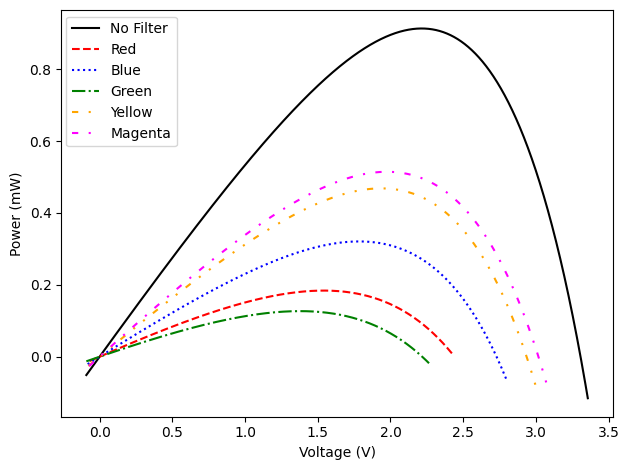

In [85]:
fig, ax1 = plt.subplots()
 
for j, color in enumerate(filters):
    data = pd.read_excel('inside.xlsx', sheet_name=color)
    v, i = data['V'], data['I']
    vfit, ifit, label = fit_exponential(v, i)
    ax1.plot(vfit, vfit*ifit, linestyle=ls[j], color=cols[j], label=filter_names[j])
    ax1.set_ylabel('Power (mW)')
    ax1.set_xlabel('Voltage (V)')

fig.legend(loc='lower left', bbox_to_anchor=(0.1,0.67), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
plt.savefig('images/in/powers.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


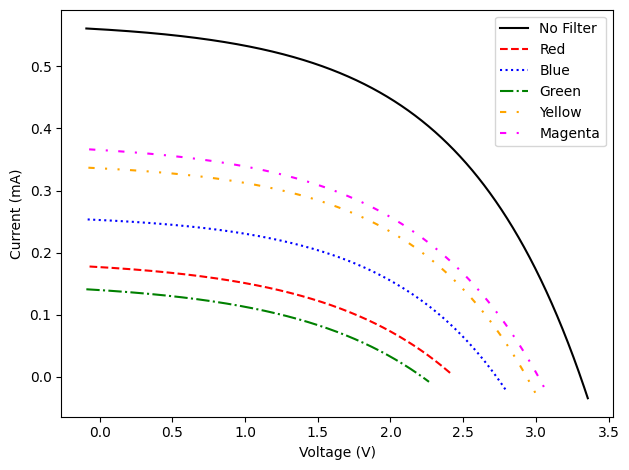

In [86]:
fig, ax1 = plt.subplots()
 
for j, color in enumerate(filters):
    data = pd.read_excel('inside.xlsx', sheet_name=color)
    v, i = data['V'], data['I']
    vfit, ifit, label = fit_exponential(v, i)
    ax1.plot(vfit, ifit, linestyle=ls[j], color=cols[j], label=filter_names[j])
    ax1.set_ylabel('Current (mA)')
    ax1.set_xlabel('Voltage (V)')

fig.legend(loc='lower left', bbox_to_anchor=(0.77,0.67), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
plt.savefig('images/in/iv.eps')